# Downloading Remote Data

For machine learning to be useful, it needs data, and large quantities (expressed as records in a database - millions of records; expressed as bytes thousands of terabytes).  Manual collection of such data for data science is impractical, so we want to automate where practical.

There are a lot of data science blog posts with databases you can download usually as a single compressed file (.zip, .tar, ....); however these examples hide the actual workflow of a data science project.  More likely you will have to visit (automated) multiple websites, identify a collection of useful files then get them to your machine for processing.  In this section some examples are presented mostly as an archive of potentially useful techniques.

:::{warning}
Good luck if these work for you as is, you will have to tinker until you can automate the process reliably. Be careful with destination directories that you don't clobber your own file system when doing recursive traverse of a remote website.  
:::


## Tools for use

A few useful modules are `requests` and `wget`; there are a few others `curl` comes to mind.  In Jupyter Notebooks downloading single files is relatively straightforward; downloading multiple files is tricky, but the most realistic representation of actual workflow.  

For multiple files I resort to operating system calls using various Magic Functions as are illustrated.  The examples herein are assuming a Linux (Debian-based) operating system, so Windoze users will have to find equivalents (or use the WSL feature in Windoze)

## Example 1 Reading a .CSV file from a Web Server

Keep in mind the example herein is about data acquisition.  In this example, we DO NOT have control of the remote server.

### Background
Global warming is a currently popular and hotly (pun intended) debated issue. 
The usual evidence is temperature data presented as a time series with various temporal correlations to industrial activity and so forth. The increase in the global temperature is not disputed - what it means for society and how to respond is widely disputed.

One possible consequence of warming, regardless of the cause is an expectation that
<strong>evaportation rates would increase</strong> and temperate regions would experience more
drought and famine, and firm water yields would drop. 

However in a paper by Peterson and others (1995) the authors concluded from analysis of pan evaporation data in various parts of the world, that there has been a <strong>downward trend in evaporation</strong> at a significance level of 99%. 
Pan evaporation is driven as much by direct solar radiation (sun shining on water) as by surrounding air temperature.

Global dimming is defined as the decrease in the amounts of solar radiation reaching the surface of the Earth. The by-product of fossil fuels is tiny particles or pollutants which absorb solar energy and reflect back sunlight into space. This phenomenon was first recognized in the year 1950. Scientists believe that since 1950, the sun’s energy reaching Earth has dropped by 9% in Antarctica, 10% in the USA, 16% in parts of Europe and 30% in Russia – putting the overall average drop to be at an enormous 22%. This causes a high risk to our environment.

Aerosols have been found to be the major cause of global dimming. The burning of fossil fuels by industry and internal combustion engines emits by-products such as sulfur dioxide, soot, and ash. These together form particulate pollution—primarily called aerosols. Aerosols act as a precursor to global dimming in the following two ways:

These particle matters enter the atmosphere and directly absorb solar energy and reflect radiation back into space before it reaches the planet’s surface.
Water droplets containing these air-borne particles form polluted clouds. These polluted clouds have a heavier and larger number of droplets. These changed properties of the cloud – such clouds are called ‘brown clouds’ – makes them more reflective.
Vapors emitted from the planes flying high in the sky called contrails are another cause of heat reflection and related global dimming.

Both global dimming and global warming have been happening all over the world and together they have caused severe changes in the rainfall patterns. It is also believed that it was global dimming behind the 1984 Saharan drought that killed millions of people in sub-Saharan Africa. Scientists believe that despite the cooling effect created by global dimming, the earth’s temperature has increased by more than 1 deg. in the last century.

In Texas, evaporation rates (reported as inches per month) are available from the Texas Water Development Board.
https://waterdatafortexas.org/lake-evaporation-rainfall
The map below shows the quadrants (grid cells) for which data are tabulated.

![figure1](EvapMap.png)

Cell '911' is located between Corpus Christi and Houston in the Coastal Plains of Texas.  A copy of the dataset downloaded from the Texas Water Development Board is located at http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/lesson8/all_quads_gross_evaporation.csv

Using naive analysis examine the data for Cell '911' and decide if the conclusions by Peterson and others (1995) are supported by this data.

### Getting the Data
To analyze these data a first step is to obtain the data.  The knowlwdge that the data are arranged in a file with a ``.csv`` extension is a clue how to proceede.  We will need a module to interface with the remote server, in this example lets use ``requests`` , which allows us to make GET and POST requests using the HTTP/HTTPS protocols to interact with web servers. So first we load the module

In [1]:
import requests # Module to process http/https requests

Now we will generate a ``GET`` request to the remote http server.  I chose to do so using a variable to store the remote URL so I can reuse code in future projects.  The ``GET`` request (an http/https method) is generated with the requests method ``get`` and assigned to an object named ``rget`` -- the name is arbitrary.  Next we extract the file from the ``rget`` object and write it to a local file with the name of the remote file - esentially automating the download process. Then we import the ``pandas`` module.

In [2]:
remote_url="http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/lesson8/all_quads_gross_evaporation.csv"  # set the url
response = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('all_quads_gross_evaporation.csv','wb').write(response.content) # extract from the remote the contents, assign to a local file same name

In [17]:
import pandas as pd # Module to process dataframes
import matplotlib.pyplot 

Now we can read the file contents and check its structure, before proceeding.

In [6]:
#evapdf = pd.read_csv("all_quads_gross_evaporation.csv",parse_dates=["YYYY-MM"]) # Read the file as a .CSV assign to a dataframe evapdf
evapdf = pd.read_csv("all_quads_gross_evaporation.csv") # Read the file as a .CSV assign to a dataframe evapdf

evapdf.head() # check structure

YYYY-MM   104   105   106   107   108   204   205   206   207  ...   911  \
0  1954-01  1.80  1.80  2.02  2.24  2.24  2.34  1.89  1.80  1.99  ...  1.42   
1  1954-02  4.27  4.27  4.13  3.98  3.90  4.18  4.26  4.27  4.26  ...  2.59   
2  1954-03  4.98  4.98  4.62  4.25  4.20  5.01  4.98  4.98  4.68  ...  3.21   
3  1954-04  6.09  5.94  5.94  6.07  5.27  6.31  5.98  5.89  5.72  ...  3.83   
4  1954-05  5.41  5.09  5.14  4.40  3.61  5.57  4.56  4.47  4.18  ...  3.48   

    912  1008  1009  1010  1011  1108  1109  1110  1210  
0  1.30  2.50  2.42  1.94  1.29  2.59  2.49  2.22  2.27  
1  2.51  4.71  4.30  3.84  2.50  5.07  4.62  4.05  4.18  
2  3.21  6.21  6.06  5.02  3.21  6.32  6.20  5.68  5.70  
3  3.54  6.45  6.25  4.92  3.54  6.59  6.44  5.88  5.95  
4  3.97  7.92  8.13  6.31  3.99  7.75  7.98  7.40  7.40  

[5 rows x 93 columns]

Structure looks like a spreadsheet as expected; lets plot the time series for cell '911'

<AxesSubplot:xlabel='YYYY-MM'>

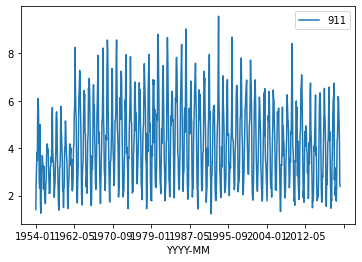

In [7]:
evapdf.plot.line(x='YYYY-MM',y='911') # Plot quadrant 911 evaporation time series 

Now we can see that the signal indeed looks like it is going up at its mean value then back down. Lets try a moving average over 12-month windows. The syntax is a bit weird, but it should dampen the high frequency (monthly) part of the signal.  Sure enough there is a downaward trend at about month 375, which we recover the date using the index -- in this case around 1985.


'1985-04'

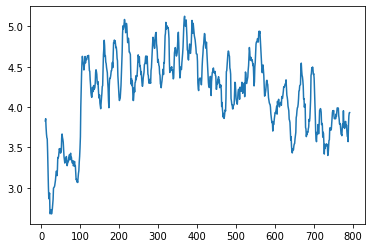

In [8]:
movingAvg=evapdf['911'].rolling(12, win_type ='boxcar').mean()
movingAvg
movingAvg.plot.line(x='YYYY-MM',y='911')
evapdf['YYYY-MM'][375]

So now lets split the dataframe at April 1985.  Here we will build two objects and can compare them.  Notice how we have split into two entire dataframes.

In [33]:
evB485loc = evapdf['YYYY-MM']<'1985-04'  # filter before 1985
evB485 = evapdf[evB485loc]
ev85uploc = evapdf['YYYY-MM']>='1985-04' # filter after 1985
ev85up= evapdf[ev85uploc]
print(evB485.head(2))
print(ev85up.head(2))

   YYYY-MM   104   105   106   107   108   204   205   206   207  ...   911  \
0  1954-01  1.80  1.80  2.02  2.24  2.24  2.34  1.89  1.80  1.99  ...  1.42   
1  1954-02  4.27  4.27  4.13  3.98  3.90  4.18  4.26  4.27  4.26  ...  2.59   

    912  1008  1009  1010  1011  1108  1109  1110  1210  
0  1.30  2.50  2.42  1.94  1.29  2.59  2.49  2.22  2.27  
1  2.51  4.71  4.30  3.84  2.50  5.07  4.62  4.05  4.18  

[2 rows x 93 columns]
     YYYY-MM   104   105   106   107   108   204   205   206   207  ...   911  \
375  1985-04  5.31  6.27  6.75  6.92  4.76  5.32  6.72  6.83  7.04  ...  4.16   
376  1985-05  4.80  5.64  5.51  5.47  5.43  4.90  6.62  6.37  6.13  ...  5.87   

      912  1008  1009  1010  1011  1108  1109  1110  1210  
375  4.45  5.26  5.06  4.91  4.41  6.24  5.58  4.81  4.63  
376  5.17  5.19  5.66  5.69  5.86  5.63  5.59  5.63  5.71  

[2 rows x 93 columns]


Now lets get some simple descriptions of the two objects, and we will ignore thay they are time series.

In [10]:
evB485['911'].describe()

count    375.000000
mean       4.202480
std        1.774273
min        1.260000
25%        2.665000
50%        3.900000
75%        5.455000
max        8.800000
Name: 911, dtype: float64

In [11]:
ev85up['911'].describe()

count    417.000000
mean       4.167458
std        1.676704
min        1.230000
25%        2.680000
50%        4.160000
75%        5.410000
max        9.560000
Name: 911, dtype: float64

If we look at the means, the after 1985 is lower, and the SD about the same, so there is maybe support of the paper claims, but the median has increased while the IQR is practically unchanged.  We can produce boxplots from the two objects and see they are different, but not by much.  So the conclusion of the paper has support but its pretty weak and hardly statisticlly significant. 

<AxesSubplot:>

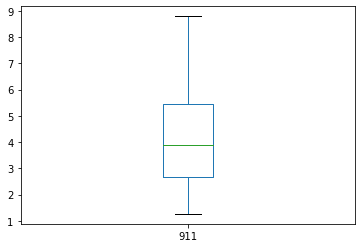

In [20]:
evB485['911'].plot.box()

<AxesSubplot:>

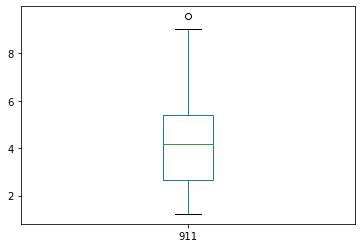

In [21]:
ev85up['911'].plot.box()

At this point, we would appeal to some kind of hypothesis testing or some other serious statistical analysis tools.  For example a non-paramatric test called the ``mannwhitneyu`` test is pretty quick to implement 

In statistics, the Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one population will be less than or greater than a randomly selected value from a second population.

This test can be used to investigate whether two independent samples were selected from populations having the same distribution parameters (in this case mean values).

As usual we need to import necessary tools, in this case scipy.stats.  Based on the module name, it looks like a collection of methods (the dot ``.`` is the giveaway).  The test itself is applied to the two objects, if there is a statistical change in behavior we expect the two collections of records to be different.

In [34]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(evB485['911'],ev85up['911'])

print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
	print('Difference in Median Values',round(evB485['911'].median()-ev85up['911'].median(),3),'is not significant')
else:
	print('Difference in Median Values',round(evB485['911'].median()-ev85up['911'].median(),3),'is SIGNIFICANT')

statistic=78184.500, p-value at rejection =0.500
Difference in Mean Values -0.26 is not significant


If there were indeed a 99% significance level, the p-value should have been smaller than 0.05 (two-tailed) and the p-value was quite high.  I usually check that I wrote the script by testing he same distribution against itself, I should get a p-value of 0.5.  Indeed that's the case.  

In [35]:
stat, p = mannwhitneyu(evB485['911'],evB485['911'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
	print('Difference in Median Values',round(evB485['911'].median()-evB485['911'].median(),3),'is not significant')
else:
	print('Difference in Median Values',round(evB485['911'].median()-evB485['911'].median(),3),'is SIGNIFICANT')

statistic=70312.500, p-value at rejection =0.500
Difference in Mean Values 0.0 is not significant


Now lets repeat the analysis but break in 1992 when Clean Air Act rules were slightly relaxed:

In [31]:
evB492loc = evapdf['YYYY-MM']<'1992'  # filter before 1992
evB492 = evapdf[evB492loc]
ev92uploc = evapdf['YYYY-MM']>='1992' # filter after 1992
ev92up= evapdf[ev92uploc]
#print(evB492.head())
#print(ev92up.head())

In [36]:
stat, p = mannwhitneyu(evB492['911'],ev92up['911'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
	print('Difference in Median Values',round(evB492['911'].median()-ev92up['911'].median(),3),'is not significant')
else:
	print('Difference in Median Values',round(evB492['911'].median()-ev92up['911'].median(),3),'is SIGNIFICANT')

statistic=72195.000, p-value at rejection =0.083
Difference in Median Values -0.045 is not significant


So even considering the key date of 1992, there is insufficient evidence for the claims (for a single spot in Texas), and one could argue that the claims are confounding -- as an FYI this eventually was a controversial paper because other researchers obtained similar results to those examined herein using subsets (by location) of the evaporation data.

### References (for this example)

[Peterson, T.C., Golubev, V.S. and Groisman, P. Ya. 1995. Evaporation
losing its strength. Nature 377: 687-688.](http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/lesson8/Peterson-Nature1995-377.pdf)

https://www.conserve-energy-future.com/causes-and-effects-of-global-dimming.php


## Example 2 - Reading a Structured .TXT File from a Web Server

This example is functionally the same, just a different file structure. 

In this example we will make a contour plot using data in a file at [http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/gridded_data.txt](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/gridded_data.txt) that 
The data in the file are organized as follows:

    160 240
    -3.0,-2.0,4.5206310380743785e-06
    -2.975,-2.0,5.248940670890073e-06
    -2.95,-2.0,6.086973208643232e-06
    -2.9250000000000003,-2.0,7.049985780998036e-06
    -2.9000000000000004,-2.0,8.155154929062083e-06
    ... many more rows
    
The first two entries are the row and column count of a rectangular region that we wish to plot the contours.  The remaining rows contain the x-,y-, and z-values.  The x and y values are the spatial locations where the z values are known.  There are a total of 38,400 records in the file - too big to manually enter.

The plotting package needs all the entries on a grid (dumb, but thats what it needs) so we need to read in the xyz data then manipultes it so that there are three 2D structures `X[160][240]`, `Y[160][240]`, and `Z[160][240]` these structures get sent to the contour plotting function.

**Step 0: <font color='red'>Download the data file to your machine!</font>**

Our first step is to create space to hold the data, then open the file

In [37]:
#%reset -f # only if necessaryimport requests # Module to process http/https requests
import requests # Module to process http/https requests
remote_url="http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/gridded_data.txt"  # set the url
response = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
localfile = open('gridded_data.txt','wb') # open connection to a local file same name as remote
localfile.write(response.content) # extract from the remote the contents,insert into the local file same name
localfile.close() # close connection to the local file

In [38]:
#### Reading a Data File ####
xyzmatrix = [] # null list to hold contents
xyzfile = open("gridded_data.txt","r") # open a read connection

Next we read the first line, and extract the row and column counts

In [39]:
line1 = (xyzfile.readline().split()) # read just the first line
rowNum = int(line1[0]) # extract row count
colNum = int(line1[1]) # extract column count

Next we read the remaining 38,000 lines

In [40]:
for line in xyzfile: # now read rest of the file, line by line
    xyzmatrix.append([float(n) for n in line.strip().split(",")])

So the read is complete, lets close the connection

In [41]:
xyzfile.close()

Now build the structures for plotting, as before we need to allocate space for the data, here we are using a constructor syntax to build matrices of zeros using implied loops.

In [42]:
#### Build 2D Structure for Contour Plot Example ####
xlist = [[0 for j in range(colNum)] for i in range(rowNum)]     # null list to hold contents
ylist = [[0 for j in range(colNum)] for i in range(rowNum)]     # null list to hold contents
zlist = [[0 for j in range(colNum)] for i in range(rowNum)]     # null list to hold contents

Next we will populate the matrices (grids) from the xyzmatrix we just read into the notebook.  Notice how we create a counter to keep track of each row of the xyzmatrix and increment the counter as we build the grids.

In [43]:
pointer=0
for irow in range(0,rowNum): 
    for jcol in range(0,colNum):
        xlist[irow][jcol]=(xyzmatrix[pointer][0])
        ylist[irow][jcol]=(xyzmatrix[pointer][1])
        zlist[irow][jcol]=(xyzmatrix[pointer][2])
        pointer += 1

Now finally the plot - using a package called matplotlib which we will study later in the course.  For now use it as shown.

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

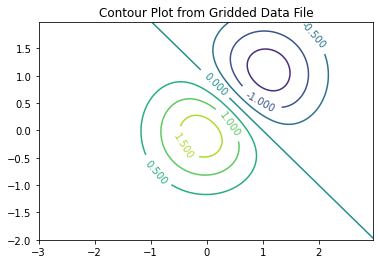

In [44]:
#### Build the Plot #####
import matplotlib
fig, ax = matplotlib.pyplot.subplots()
CS = ax.contour(xlist, ylist, zlist, levels = 7)
ax.clabel(CS, inline=2, fontsize=10)
ax.set_title('Contour Plot from Gridded Data File')
################################

### References (for this example)

1. [About Contour Plots](https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html)

## Example 3 - Reading Contents of a Web Server Directory

This example will read the contents of a web directory that contains a lot of files we wish to process.  

Later in the course we will process images using a Neural Network to make a surface crack detection (classification) engine.  Such a problem will consist of a collection of images (multiple files) a truth-table with image name and its expert (human) determination of classification (cracked specimen or not).  

The figure below shows the directory of interest, with a collection of many files (Image#.png) and there is a single .csv file with the truth table.

![figure2](DatabaseStructure.png)

One would find right-click/download file-by-file extremely annoying to get a copy to your local computer.  Instead we can automate the process using `wget` and Jupyter magic functions.

:::{warning}
Danger Willy Robinson!  We are about to do hard to stop processing.  Go slowly on your own machine.  You will need this database later on in the class, so pay attention!
:::

In [5]:
# magic function to check my current working directory (that the script will run)
%pwd # notice no space between % and pwd

'/home/sensei/ce-5319-webroot/ce5319jb/lessons/lesson8'

In [8]:
# Delete the directory if it already exists BE CAREFUL 
# This code is here so the notebook resets during Jupyter Book builds
%rm -rf ./MyImageFiles/
%rm -rf wget-log*

In [10]:
# magic function to create a destination to store the files into
%mkdir MyImageFiles # name the directory what you wish, locate it somewhere you can find
# In the example, its just being stored in the lesson directory, which you probably don't have

In [11]:
# magic function to list the contents of my current directory
%ls 

DatabaseStructure.png            concreteData.xls
EvapMap.png                      datatypes.ipynb
EvaporationAnalysis.html         downloading.ipynb
HighestGrossingMovies.bak.csv    exploratorydataanalysis.ipynb
HighestGrossingMovies.csv        exploratorydataanalysisvisual.ipynb
MyImageFiles/                    gridded_data.txt
Peterson-Nature1995-377.pdf      gridded_data.txt.bak
all_quads_gross_evaporation.csv  lesson8.ipynb
all_quads_net_evaporation.csv    mixturedatatype.png
cat784.png                       pip-corner-sumps.txt
censoreddatatype.png             quad-list.png
concreteData.csv                 top_movies.csv


Notice the MyImageFiles directory, this is where we will download to (the destination)!

In [12]:
# magic function to show contents of MyImageFiles (there will only be two system files)
# . == self and ..= parent directories.
%ls -la ./MyImageFiles/

total 8
drwxrwxr-x 2 sensei sensei 4096 Sep 20 20:51 ./
drwxrwxr-x 4 sensei sensei 4096 Sep 20 20:51 ../


Now we will connect to the remote computer and try to get the files - this takes awhile.  What will happen is the wget tool is invoked with a bunch of settings:

- nd == No directories, don't maintain directory structure, just get files
- nH == No host, dont bother with recording hostname information
- --no-parent == Do not ascend the parent directory
- --reject == Discard files with named pattern, in this case index files
- -e robots=off == Disable the robot.txt default file instructions
- --recursive == descend the directory structure from supplied starting directory
- -P ./MyImageFiles == relative or absolute path to store results
- http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/ == the URL to attempt to copy, this defines the starting directory 

:::{warning}
There is a lot of output generated - I did not figure out how to suppress, but it is essentially a transcript of the transactions between the server and your computer.

Scroll past this to continue the lesson
:::

In [13]:
####################################
# Here is the directory "get" call #
####################################
! wget -nd -nH --no-parent --reject "index.html*" -e robots=off --recursive -P ./MyImageFiles http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/ 
#
#
#
#

--2022-09-20 20:56:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/
Connecting to 54.243.252.9:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./MyImageFiles/index.html.tmp’

index.html.tmp          [ <=>                ] 176.39K   951KB/s    in 0.2s    

2022-09-20 20:56:34 (951 KB/s) - ‘./MyImageFiles/index.html.tmp’ saved [180622]

Removing ./MyImageFiles/index.html.tmp since it should be rejected.

--2022-09-20 20:56:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/?C=N;O=D
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./MyImageFiles/index.html?C=N;O=D.tmp’

index.html?C=N;O=D.     [ <=>                ] 176.39K  --.-KB/s    in 0.05s   

2022-09-20 20:56:34 (3.78 MB/s) - ‘./MyImageFiles/index.html?C=N;O=D.tmp’ saved [180622]

Removing ./MyImageFiles/inde

### Contents of MyImages (after wget completes)

:::{note}
This note is inserted so its easy to find the post-wget materials
:::

In [14]:
# magic function to show contents of MyImageFiles 
# Now we have all the files local to our machine!
%ls ./MyImageFiles/

Image0.png    Image258.png  Image417.png  Image577.png  Image736.png
Image1.png    Image259.png  Image418.png  Image578.png  Image737.png
Image10.png   Image26.png   Image419.png  Image579.png  Image738.png
Image100.png  Image260.png  Image42.png   Image58.png   Image739.png
Image101.png  Image261.png  Image420.png  Image580.png  Image74.png
Image102.png  Image262.png  Image421.png  Image581.png  Image740.png
Image103.png  Image263.png  Image422.png  Image582.png  Image741.png
Image104.png  Image264.png  Image423.png  Image583.png  Image742.png
Image105.png  Image265.png  Image424.png  Image584.png  Image743.png
Image106.png  Image266.png  Image425.png  Image585.png  Image744.png
Image107.png  Image267.png  Image426.png  Image586.png  Image745.png
Image108.png  Image268.png  Image427.png  Image587.png  Image746.png
Image109.png  Image269.png  Image428.png  Image588.png  Image747.png
Image11.png   Image27.png   Image429.png  Image589.png  Image748.png
Image110.png  Image270.png  Image43

Now we have the files, if we browse our machine we can examine them.  The copies for this example are residing at [Link](http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/lesson8/MyImageFiles)

### Databases for Examples

Some subsequent examples will make use of the [Material Cracking](http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/) databases like above above (for classification engines) and the [ConcreteStrength](http://54.243.252.9/ce-5319-webroot/1-Databases/ConcreteMixtures/concreteData.xls) (for prediction engines).  

We already have the image files from the [Material Cracking](http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/) directory.

Now lets get the [ConcreteStrength](http://54.243.252.9/ce-5319-webroot/1-Databases/ConcreteMixtures/concreteData.csv) database (and automate the getting, so if we lose the local path we can easily recover a copy).

In [18]:
import requests # Module to process http/https requests
remote_url="http://54.243.252.9/ce-5319-webroot/1-Databases/ConcreteMixtures/concreteData.csv"  # set the url
response = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('concreteData.csv','wb').write(response.content); # extract from the remote the contents, assign to a local file same name

### References 

1. [`wget` recursive directory hints](https://stackoverflow.com/questions/273743/using-wget-to-recursively-fetch-a-directory-with-arbitrary-files-in-it)
2. [`wget` mirror hints](https://stackoverflow.com/questions/5043239/how-do-i-mirror-a-directory-with-wget-without-creating-parent-directories)
3. [Jupyter Directory (magic functions) manipulation](https://stackoverflow.com/questions/15680463/change-ipython-jupyter-notebook-working-directory)
4. [List processing tips](https://www.programiz.com/python-programming/del)
5. [Character replacement tips](https://www.geeksforgeeks.org/python-string-replace/)
6. [Python file manipulations](https://www.tutorialspoint.com/python/python_files_io.htm)